In [1]:
models = [i for i in ["trained_iris_model_11_5", "trained_iris_model_14_11", "trained_iris_model_5_11_8", "trained_iris_model_14_5", "trained_iris_model_big"]]
executable_path = "inference/.stack-work/dist/ab060f89/build/inference-exe/inference-exe.exe"

models

['trained_iris_model_11_5',
 'trained_iris_model_14_11',
 'trained_iris_model_5_11_8',
 'trained_iris_model_14_5',
 'trained_iris_model_big']

In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = "iris_generated_unlab.csv"
X = np.array(pd.read_csv(data))
X.shape

(20150, 4)

In [4]:
RUNS = 10

In [5]:
from timeit import default_timer as timer
from subprocess import run
from os.path import abspath

In [10]:
sklearn_times = {model: [] for model in models}
haskell_times = {model: [] for model in models}

for model in models:
	with open("models/" + model + ".pkl", "rb") as f:
		ffn = pickle.load(f)
	
	for i in range(RUNS):
		start = timer()
		ffn.predict_proba(X)
		end = timer()
		sklearn_times[model].append(end - start)

	for i in range(RUNS):
		res = run([executable_path, "weights/" + model + ".txt", data, "run", "timer"], capture_output = True)
		out = str(res.stdout)
		time = float(out.split(":")[1].replace("\\r", "").replace("\\n", "").replace("s", "").replace("'", "").strip())
		haskell_times[model].append(time)

	
	
print(sklearn_times)
print(haskell_times)

c:\Users\santr\My Drive (santripta.sharma_ug24@ashoka.edu.in)\Academic Work\Sem6\FuncProg\Proj\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
c:\Users\santr\My Drive (santripta.sharma_ug24@ashoka.edu.in)\Academic Work\Sem6\FuncProg\Proj\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
c:\Users\santr\My Drive (santripta.sharma_ug24@ashoka.edu.in)\Academic Work\Sem6\FuncProg\Proj\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
c:\Users\santr\My Drive (santripta.sharma_ug24@ashoka.edu.in)\Academic Work\Sem6\FuncProg\Proj\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
 

{'trained_iris_model_11_5': [0.006031099997926503, 0.004606499976944178, 0.0046082000189926475, 0.005731299985200167, 0.005092800012789667, 0.005281399993691593, 0.00534999999217689, 0.006115299998782575, 0.007408800011035055, 0.0052488999790512025], 'trained_iris_model_14_11': [0.006884800008265302, 0.006327200011583045, 0.006488100014394149, 0.006118699995568022, 0.0067146000219509006, 0.0061215999885462224, 0.005980800022371113, 0.006384400010574609, 0.007329799991566688, 0.006064899993361905], 'trained_iris_model_5_11_8': [0.004946700006257743, 0.007207000016933307, 0.005512500007171184, 0.004987199994502589, 0.004735900001833215, 0.004481999989366159, 0.0045652999833691865, 0.004642699990654364, 0.005938800022704527, 0.004439699987415224], 'trained_iris_model_14_5': [0.005413999984739348, 0.00534570001764223, 0.007914300018455833, 0.006129200017312542, 0.006169800006318837, 0.004551199992420152, 0.00540339999133721, 0.0055905999906826764, 0.005191999982343987, 0.004891299991868436

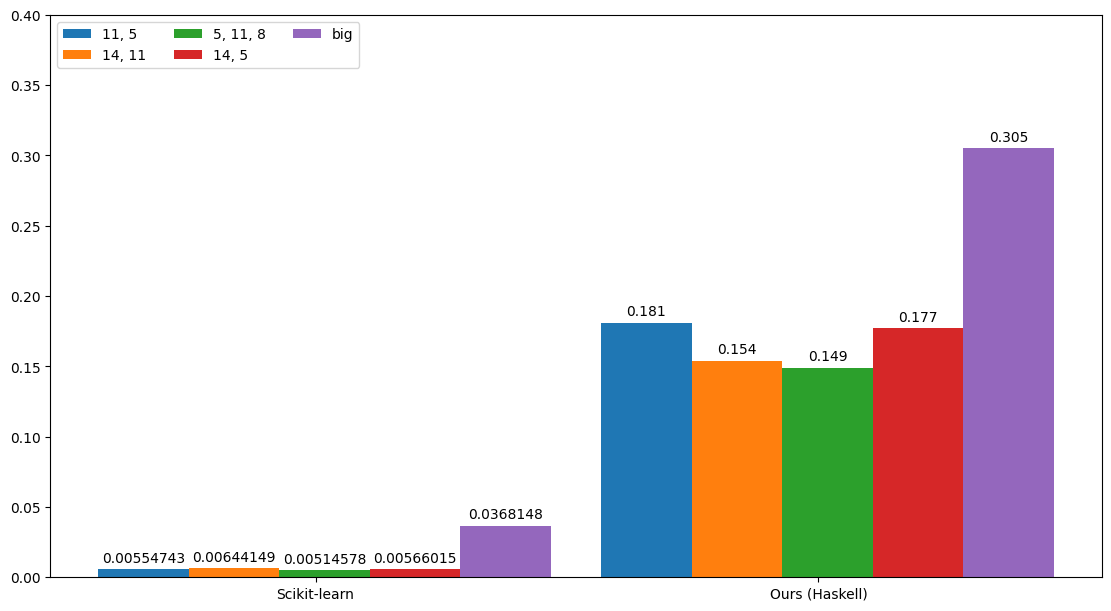

In [49]:
sklearn_avgs = {", ".join(key.split("_")[3:]): np.average(val) for (key, val) in sklearn_times.items()}
haskell_avgs = {", ".join(key.split("_")[3:]): np.average(val) for (key, val) in haskell_times.items()}

x_keys = ["Scikit-learn", "Ours (Haskell)"]
vals = {
	key: (sklearn_avgs[key], haskell_avgs[key]) for key in sklearn_avgs.keys()
}

x = np.arange(len(x_keys))
width = 0.18  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')
fig.set_figwidth(11)
fig.set_figheight(6)

for attribute, measurement in vals.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding = 3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xticks(x + width * 1.9, x_keys)
ax.legend(loc='upper left', ncols=3)

ax.set_ylim(0, 0.4)

plt.show()
fig.savefig("benchmark.png")